In [1]:
import pandas as pd
from pymer4.models import Lmer # supports Generalized linear models with or without mixed effects
import rpy2.robjects.lib.ggplot2 as ggplot2 # for visualizing residual plots to diagnose model fit


# Dataframe is stored in local file: data.csv
# You may want to replace the data path with an existing data file you already have.
# You may also set df equal to a pandas dataframe you are already working with. 
df = pd.read_csv('examples/Animal_Science/pigs.csv') # Make sure that the data path is correct


model = Lmer(formula='Weight ~ Time + (1|Pig) + (1|Litter) + (1|Time)', family="gaussian", data=df)
print(model.fit())



Formula: Weight~Time+(1|Pig)+(1|Litter)+(1|Time)

Family: gaussian	 Inference: parametric

Number of observations: 861	 Groups: {'Pig': 72.0, 'Litter': 21.0, 'Time': 12.0}

Log-likelihood: -2355.822 	 AIC: 4711.644

Random effects:

                 Name     Var    Std
Pig       (Intercept)  31.315  5.596
Litter    (Intercept)   9.528  3.087
Time      (Intercept)   1.764  1.328
Residual                9.757  3.124

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
(Intercept)    15.686  13.195   18.177  1.271  27.926  12.342    0.0  ***
Time            6.943   6.718    7.169  0.115  10.013  60.228    0.0  ***


In [2]:
model

pymer4.models.Lmer(fitted = True, formula = Weight~Time+(1|Pig)+(1|Litter)+(1|Time), family = gaussian)

In [3]:
modeldf = model.fit()

Formula: Weight~Time+(1|Pig)+(1|Litter)+(1|Time)

Family: gaussian	 Inference: parametric

Number of observations: 861	 Groups: {'Pig': 72.0, 'Litter': 21.0, 'Time': 12.0}

Log-likelihood: -2355.822 	 AIC: 4711.644

Random effects:

                 Name     Var    Std
Pig       (Intercept)  31.315  5.596
Litter    (Intercept)   9.528  3.087
Time      (Intercept)   1.764  1.328
Residual                9.757  3.124

No random effect correlations specified

Fixed effects:



In [4]:
modeldf

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),15.686,13.195,18.177,1.271,27.926,12.342,0.0,***
Time,6.943,6.718,7.169,0.115,10.013,60.228,0.0,***


In [5]:
model.predict(df)

array([22.62912609, 29.5726026 , 36.5160791 , 43.4595556 , 50.4030321 ,
       57.3465086 , 64.2899851 , 71.2334616 , 78.1769381 , 85.1204146 ,
       92.0638911 , 99.00736761, 22.62912609, 29.5726026 , 36.5160791 ,
       43.4595556 , 50.4030321 , 57.3465086 , 64.2899851 , 71.2334616 ,
       78.1769381 , 85.1204146 , 92.0638911 , 99.00736761, 22.62912609,
       29.5726026 , 36.5160791 , 43.4595556 , 50.4030321 , 57.3465086 ,
       64.2899851 , 71.2334616 , 78.1769381 , 85.1204146 , 92.0638911 ,
       99.00736761, 22.62912609, 29.5726026 , 36.5160791 , 43.4595556 ,
       50.4030321 , 57.3465086 , 64.2899851 , 71.2334616 , 78.1769381 ,
       85.1204146 , 92.0638911 , 99.00736761, 22.62912609, 29.5726026 ,
       36.5160791 , 43.4595556 , 50.4030321 , 57.3465086 , 64.2899851 ,
       71.2334616 , 78.1769381 , 85.1204146 , 92.0638911 , 99.00736761,
       22.62912609, 29.5726026 , 36.5160791 , 43.4595556 , 50.4030321 ,
       57.3465086 , 64.2899851 , 71.2334616 , 78.1769381 , 85.12

In [6]:
df["predicted"] = model.predict(df)

In [7]:
df

,Unnamed: 0,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time,predicted
0,1,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1,22.629126
1,2,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2,29.572603
2,3,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3,36.516079
3,4,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4,43.459556
4,5,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5,50.403032
...,...,...,...,...,...,...,...,...,...,...
856,857,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8,71.233462
857,858,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9,78.176938
858,859,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10,85.120415
859,860,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11,92.063891


In [50]:
df["residuals"] = df["Weight"] - df["predicted"]

In [51]:
df

,Unnamed: 0,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time,predicted,residuals
0,1,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1,22.629126,3.870874
1,2,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2,29.572603,-1.972613
2,3,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3,36.516079,-0.016079
3,4,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4,43.459556,-3.159566
4,5,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5,50.403032,-1.303052
...,...,...,...,...,...,...,...,...,...,...,...
856,857,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8,71.233462,1.966488
857,858,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9,78.176938,3.523012
858,859,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10,85.120415,5.179575
859,860,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11,92.063891,3.936109


In [52]:
df.to_csv("temp.csv", index=False)





In [53]:
from rpy2.robjects.vectors import DataFrame

In [54]:
rdf = DataFrame.from_csvfile("temp.csv")

In [55]:
plot = (ggplot2.ggplot(rdf) + 
        ggplot2.aes_string(x="Time", y="Weight") +
        ggplot2.geom_smooth(method = "lm", se = False, color = "lightgrey") +
        ggplot2.geom_segment(ggplot2.aes_string(xend = "Time", yend = "predicted"), alpha=0.2) + 
        ggplot2.geom_point(shape=1) + 
        ggplot2.geom_point(ggplot2.aes_string(color = "residuals")) +
        ggplot2.scale_color_gradient2(low = "blue", mid = "white", high = "red") +
        ggplot2.guides(color=False) +
        ggplot2.geom_point(ggplot2.aes_string(y = "predicted")) +
        ggplot2.theme_bw()
       )


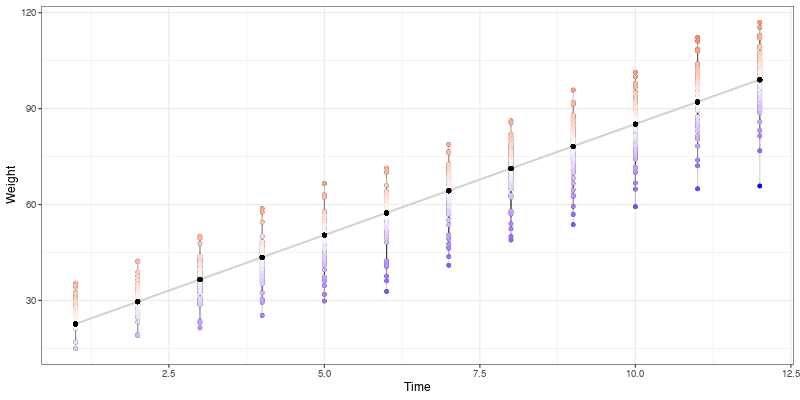

In [56]:
from rpy2.ipython.ggplot import image_png
image_png(plot)